In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn as mgl
from sklearn.model_selection import train_test_split

w[0]: 0.393906  b: -0.031804


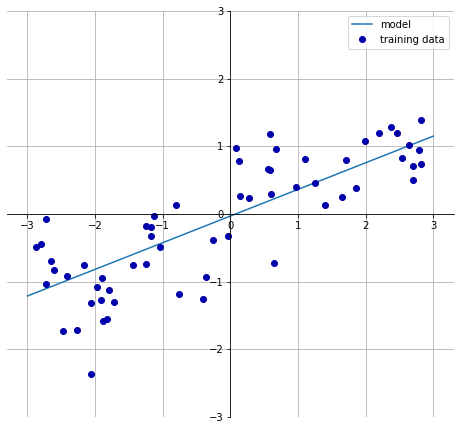

In [17]:
mgl.plots.plot_linear_regression_wave()

***

### Линейная регрессия, метод наименьших квадратов, MSE

In [18]:
from sklearn.linear_model import LinearRegression
X, y = mgl.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [19]:
print('lr.coef_: {}'.format(lr.coef_))
print('lr.intercept_: {}'.format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [20]:
print('Правильность на обучающем наборе: {:.2f}'.format(lr.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.2f}'.format(lr.score(X_test, y_test)))

Правильность на обучающем наборе: 0.67
Правильность на тестовом наборе: 0.66


In [22]:
X, y = mgl.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [23]:
print('Правильность на обучающем наборе: {:.2f}'.format(lr.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.2f}'.format(lr.score(X_test, y_test)))

Правильность на обучающем наборе: 0.95
Правильность на тестовом наборе: 0.61


***

### Гребневая регрессия

In [25]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.2f}'.format(ridge.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.2f}'.format(ridge.score(X_test, y_test)))

Правильность на обучающем наборе: 0.89
Правильность на тестовом наборе: 0.75


In [30]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.2f}'.format(ridge10.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.2f}'.format(ridge10.score(X_test, y_test)))

Правильность на обучающем наборе: 0.79
Правильность на тестовом наборе: 0.64


In [33]:
ridge01 = Ridge(alpha=.1).fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.2f}'.format(ridge01.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.2f}'.format(ridge01.score(X_test, y_test)))

Правильность на обучающем наборе: 0.93
Правильность на тестовом наборе: 0.77


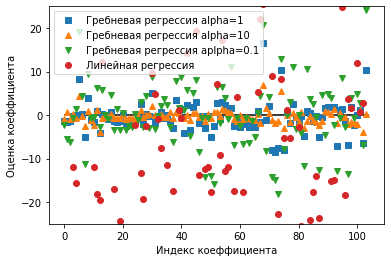

In [34]:
plt.plot(ridge.coef_, 's', label='Гребневая регрессия alpha=1')
plt.plot(ridge10.coef_, '^', label='Гребневая регрессия alpha=10')
plt.plot(ridge01.coef_, 'v', label='Гребневая регрессия aplpha=0.1')
plt.plot(lr.coef_, 'o', label='Линейная регрессия')
plt.xlabel('Индекс коеффициента')
plt.ylabel('Оценка коеффициента')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

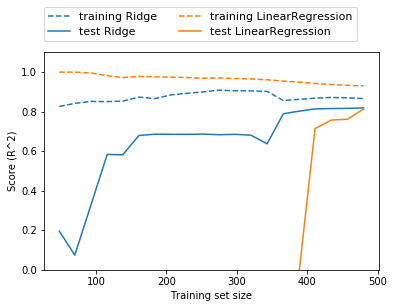

In [35]:
mgl.plots.plot_ridge_n_samples()

***

### Лассо-регрессия

In [38]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.2f}'.format(lasso.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.2f}'.format(lasso.score(X_test, y_test)))
print('Количество использованных признаков: {}'.format(np.sum(lasso.coef_!=0)))

Правильность на обучающем наборе: 0.29
Правильность на тестовом наборе: 0.21
Количество использованных признаков: 4


In [39]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.2f}'.format(lasso001.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.2f}'.format(lasso001.score(X_test, y_test)))
print('Количество использованных признаков: {}'.format(np.sum(lasso001.coef_!=0)))

Правильность на обучающем наборе: 0.90
Правильность на тестовом наборе: 0.77
Количество использованных признаков: 33


In [40]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.2f}'.format(lasso00001.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.2f}'.format(lasso00001.score(X_test, y_test)))
print('Количество использованных признаков: {}'.format(np.sum(lasso00001.coef_!=0)))

Правильность на обучающем наборе: 0.95
Правильность на тестовом наборе: 0.64
Количество использованных признаков: 96


Text(0, 0.5, 'Оценка коеффициента')

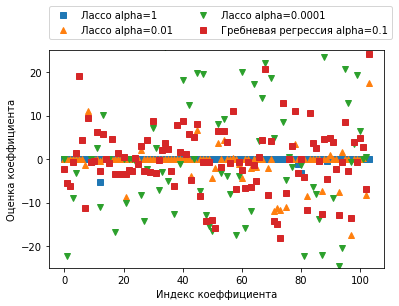

In [42]:
plt.plot(lasso.coef_, 's', label='Лассо alpha=1')
plt.plot(lasso001.coef_, '^', label='Лассо alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Лассо alpha=0.0001')
plt.plot(ridge01.coef_, 's', label='Гребневая регрессия alpha=0.1')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel('Индекс коеффициента')
plt.ylabel('Оценка коеффициента')